In [1]:
import numpy as np;
import pandas as pd;
from matplotlib import pyplot as plt;

df = pd.read_csv(r"C:\Users\Raider\Downloads\iris.csv");
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [2]:
df.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [3]:
df.variety = df.variety.replace({"Setosa":1,"Versicolor":2,"Virginica":3})
print(df)
print(df.variety.unique())

     sepal.length  sepal.width  petal.length  petal.width  variety
0             5.1          3.5           1.4          0.2        1
1             4.9          3.0           1.4          0.2        1
2             4.7          3.2           1.3          0.2        1
3             4.6          3.1           1.5          0.2        1
4             5.0          3.6           1.4          0.2        1
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        3
146           6.3          2.5           5.0          1.9        3
147           6.5          3.0           5.2          2.0        3
148           6.2          3.4           5.4          2.3        3
149           5.9          3.0           5.1          1.8        3

[150 rows x 5 columns]
[1 2 3]


In [4]:
X = df.drop(['variety'], axis = 1)
Y = df.variety

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
model = LogisticRegression(multi_class="multinomial", solver="newton-cg");
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(y_pred)

[3 2 1 3 1 3 1 2 2 2 3 2 2 2 2 1 2 2 1 1 3 2 1 1 3 1 1 2 2 1 3 2 1 3 3 2 1
 3 2 2 3 1 3 1 1]


In [5]:
print('Intercept: ', model.intercept_)
print('Coefficient: ', model.coef_)
print('Predicted Values: ', y_pred)
print('Confusion matrix: ', metrics.confusion_matrix(y_test, y_pred))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score', r2_score(y_test, y_pred))
print('Predicted Values Probability: ', model.predict_proba(x_test))
print("Accuracy for training set: ", model.score(x_train, y_train))
print("Accuracy for test set: ", model.score(x_test, y_test))

Intercept:  [  9.00141172   1.54232621 -10.54373793]
Coefficient:  [[-0.39797204  0.83359486 -2.2895243  -0.97845001]
 [ 0.544525   -0.29022905 -0.2326071  -0.65817475]
 [-0.14655296 -0.54336581  2.5221314   1.63662476]]
Predicted Values:  [3 2 1 3 1 3 1 2 2 2 3 2 2 2 2 1 2 2 1 1 3 2 1 1 3 1 1 2 2 1 3 2 1 3 3 2 1
 3 2 2 3 1 3 1 1]
Confusion matrix:  [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Mean Absolute Error:  0.022222222222222223
Mean Squared Error:  0.022222222222222223
Root Mean Squared Error:  0.14907119849998599
R2 Score 0.9621848739495799
Predicted Values Probability:  [[1.31684876e-04 5.98765637e-02 9.39991751e-01]
 [1.33618472e-02 9.57026964e-01 2.96111893e-02]
 [9.82904049e-01 1.70958951e-02 5.56885986e-08]
 [1.60239850e-06 2.60723043e-02 9.73926093e-01]
 [9.68267388e-01 3.17323761e-02 2.35520222e-07]
 [2.47511180e-06 6.75814563e-03 9.93239379e-01]
 [9.80351378e-01 1.96485189e-02 1.03097983e-07]
 [3.00586368e-03 7.50154484e-01 2.46839653e-01]
 [1.62182124e-03 7.41240425e-01 2.571

Text(33.0, 0.5, 'Actual Values')

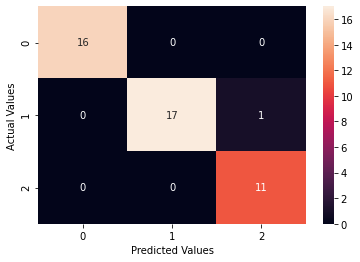

In [6]:
import seaborn as sn

cm = metrics.confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')